In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

### Data set

In [48]:
df = pd.read_csv('food_delivery_apps.csv')
df.head()

,date,content,score,userName,app,platform,replyContent,repliedDate,appVersion
0,2022-10-20 17:08:18,"Being single and traveling a lot for work, all...",5,TBeck-NARC,Bolt Food,App Store,NaN,NaN,NaN
1,2022-08-19 15:56:51,App is well-designed and nice to use. Only com...,4,henhouse,Bolt Food,App Store,NaN,NaN,NaN
2,2023-07-26 09:03:32,I’ve had this payment issue for over a month n...,1,hsghdoenvskrbbd,Bolt Food,App Store,NaN,NaN,NaN
3,2022-11-22 10:00:43,Live activities would be nice instead of getti...,4,Sussy31,Bolt Food,App Store,NaN,NaN,NaN
4,2023-06-14 09:04:39,After waiting for over an hour for our food an...,1,schalas1985,Bolt Food,App Store,NaN,NaN,NaN


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247061 entries, 0 to 1247060
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   date          1247061 non-null  object
 1   content       1247061 non-null  object
 2   score         1247061 non-null  int64 
 3   userName      1247061 non-null  object
 4   app           1247061 non-null  object
 5   platform      1247061 non-null  object
 6   replyContent  203760 non-null   object
 7   repliedDate   203760 non-null   object
 8   appVersion    973010 non-null   object
dtypes: int64(1), object(8)
memory usage: 85.6+ MB


### Data cleaning

Drop duplicates

In [50]:
df = df.drop_duplicates()

Drop unused columns

In [51]:
columnsToDrop = ['repliedDate', 'replyContent', 'appVersion']
df = df.drop(columns=columnsToDrop)

Change date format for better visualizations

In [52]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'] = df['date'].dt.strftime('%d-%m-%Y')
df.head()

,date,content,score,userName,app,platform
0,20-10-2022,"Being single and traveling a lot for work, all...",5,TBeck-NARC,Bolt Food,App Store
1,19-08-2022,App is well-designed and nice to use. Only com...,4,henhouse,Bolt Food,App Store
2,26-07-2023,I’ve had this payment issue for over a month n...,1,hsghdoenvskrbbd,Bolt Food,App Store
3,22-11-2022,Live activities would be nice instead of getti...,4,Sussy31,Bolt Food,App Store
4,14-06-2023,After waiting for over an hour for our food an...,1,schalas1985,Bolt Food,App Store


Analysis

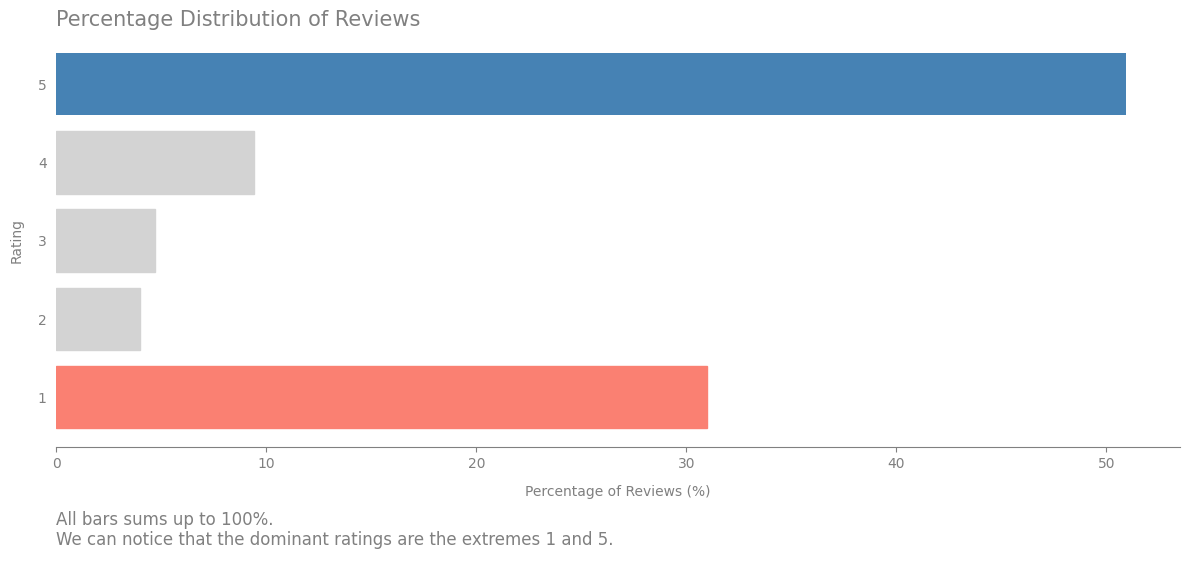

In [112]:
scoreCount = df.groupby('score').size()

# Calculate percentage distribution
totalCount = scoreCount.sum()
scorePercentage = (scoreCount / totalCount) * 100

fig, ax = plt.subplots(figsize=(12, 6))
plt.barh(scorePercentage.index, scorePercentage, color='steelblue')
bars = ax.patches

# Change color of bars
colors = ['salmon', 'lightgrey', 'lightgrey', 'lightgrey']
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Customize plot
plt.title("Percentage Distribution of Reviews",
          loc='left', fontsize=15, color='grey')
plt.xlabel("Percentage of Reviews (%)", color='grey', labelpad=10)
plt.xticks(color='grey')
plt.ylabel("Rating", color='grey', labelpad=10)
plt.yticks(color='grey')
plt.tick_params(left=False)
plt.tick_params(axis='x', color='grey')
ax.spines['bottom'].set_color('grey')

# Description
description = """
All bars sums up to 100%. \nWe can notice that the dominant ratings are the extremes 1 and 5.
"""
plt.text(0, -0.2, description, ha='left', va='center',
         fontsize=12, color='grey', transform=ax.transAxes)

plt.tight_layout()
plt.show()

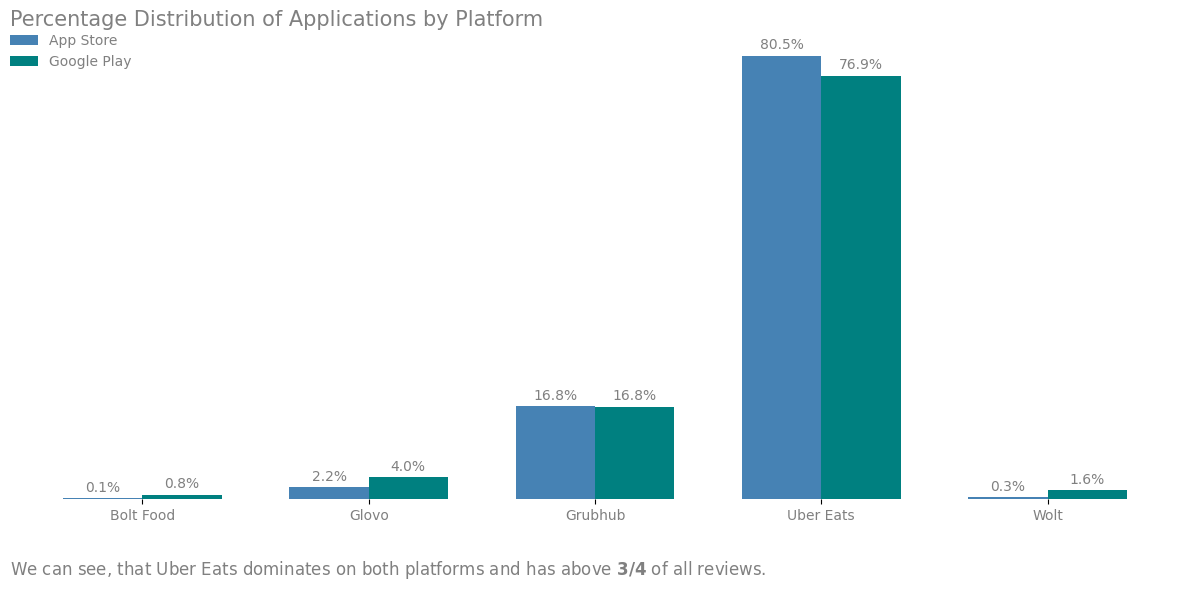

In [139]:
platforms = df['platform'].unique()
apps = df['app'].unique()
width = 0.35  
x = np.arange(len(apps)) 
colors = ['steelblue', 'teal']

fig, ax = plt.subplots(figsize=(12, 6))

for i, platform in enumerate(platforms):
    platform_df = df[df['platform'] == platform]
    appCount = platform_df['app'].value_counts()
    appPercentage = (appCount / appCount.sum()) * 100
    appPercentage = appPercentage.reindex(apps, fill_value=0)
    ax.bar(x + i * width - width / 2, appPercentage, width, label=platform, color=colors[i])

ax.set_title('Percentage Distribution of Applications by Platform',
             loc='left', fontsize=15, color='grey')
ax.set_xticks(x)
plt.xticks(color='grey')
ax.spines['bottom'].set_color('none')
ax.set_yticks([])
ax.set_xticklabels(apps)

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color='gray')


bars = ax.patches
add_labels(bars)

# Description
description = ("We can see, that Uber Eats dominates on both platforms and has above "
               r"$\bf{3/4}$ of all reviews.")
plt.text(0, -0.15, description, ha='left', va='center',
         fontsize=12, color='grey', transform=ax.transAxes)


plt.legend(loc='upper left', frameon=False, borderpad=0.0, borderaxespad=0, labelcolor='grey')
plt.tight_layout()
plt.show()